<a href="https://colab.research.google.com/github/astasinos/ML-Notebooks/blob/main/pytorch_MNIST_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Author: Alkis Stasinos 2020
MNIST Digit Image Classifier

Based on : https://pythonprogramming.net/training-deep-learning-neural-network-pytorch/

"""

import torch
import torchvision 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
train = torchvision.datasets.MNIST("", train = True, download = True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
test = torchvision.datasets.MNIST("", train = False, download = True, transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]))
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

In [ ]:
total = 0
count_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  X, Y = data
  for num in Y:
    count_dict[int(num)] += 1
    total += 1

print("Total numbers {total}\n".format(total = total))
for i in range(10):
  print("Total {num}s : {count}, percentage = {percent:.2f} %".format(num=i, count=count_dict[i], percent = 100 * count_dict[i]/float(total)))


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()


In [ ]:
random = torch.randn((28,28))
random = random.view(-1,28*28)
out = net(random)
print(out)

tensor([[-2.3367, -2.1743, -2.2808, -2.3097, -2.3294, -2.3691, -2.4323, -2.2267,
         -2.2839, -2.3061]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
def acc(net, train = False):
  correct = 0
  total = 0
  dataset = testset
  if (train):
    dataset = trainset

  with torch.no_grad():
      for data in testset:
          X, y = data
          output = net(X.view(-1,784))
          for idx, i in enumerate(output):
              if torch.argmax(i) == y[idx]:
                  correct += 1
              total += 1

  return round(correct/total, 3)

testacc = []
trainacc = []

for epoch in range(3): 
    for data in trainset: 
        X, y = data  
        net.zero_grad()  
        output = net(X.view(-1,784))  
        loss = F.nll_loss(output, y)  
        loss.backward()  
        optimizer.step()  
    
    testacc.append(acc(net, train = False))
    trainacc.append(acc(net, train = True))
    
    print(loss)  
    

tensor(9.5367e-08, grad_fn=<NllLossBackward>)
tensor(5.5550e-06, grad_fn=<NllLossBackward>)
tensor(5.4836e-07, grad_fn=<NllLossBackward>)
[0.976, 0.974, 0.97]
[0.976, 0.974, 0.97]


3


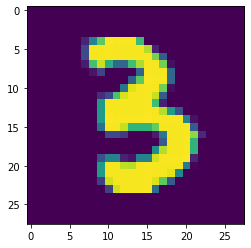

In [ ]:
plt.imshow(X[1].view(28,28))
print(int(torch.argmax(net(X[1].view(-1,784)))))
  